<a href="https://colab.research.google.com/github/she-codesstuff/tree-spices-classification/blob/main/tree_species_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

def load_images_from_folder(folder_path, image_size=(224, 224)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)

    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                img = load_img(img_path, target_size=image_size)
                img_array = img_to_array(img)
                img_array = preprocess_input(img_array)
                images.append(img_array)
                labels.append(class_name)
            except:
                print(f"Error loading image: {img_path}")
    return np.array(images), np.array(labels)



In [75]:
# Run this
folder_path = '/content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset'
X, y = load_images_from_folder(folder_path)
print(X.shape, y.shape)


Error loading image: /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/hooks
Error loading image: /content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset/.git/info
(755, 224, 224, 3) (755,)


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load VGG16 without top layer (used for classification)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# We'll use the output of the last convolutional block as features
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
features = model.predict(X, batch_size=32, verbose=1)
print("Extracted Features Shape:", features.shape)  # Should be (755, 7, 7, 512)


24/24 ━━━━━━━━━━━━━━━━━━━━ 408s 17s/step
Extracted Features Shape: (755, 7, 7, 512)


In [2]:
import os
import cv2
import numpy as np

# Dataset path (update if needed)
dataset_path = "/content/drive/MyDrive/Tree_Species_Dataset/Tree_Species_Dataset"

# Prepare image and label lists
X = []
y = []
class_names = []

for label in sorted(os.listdir(dataset_path)):
    label_path = os.path.join(dataset_path, label)
    if not os.path.isdir(label_path) or label.startswith("."):
        continue
    class_names.append(label)
    for file in os.listdir(label_path):
        file_path = os.path.join(label_path, file)
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        try:
            img = cv2.imread(file_path)
            img = cv2.resize(img, (224, 224))
            X.append(img)
            y.append(label)
        except Exception as e:
            print("Error loading image:", file_path)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(755, 224, 224, 3) (755,)


In [4]:
# Flatten features from (7, 7, 512) to (25088,)
X_features = features.reshape(features.shape[0], -1)
print("Flattened features shape:", X_features.shape)


Flattened features shape: (755, 25088)


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)


ValueError: Number of classes, 15, does not match size of target_names, 17. Try specifying the labels parameter

In [8]:
import numpy as np
from sklearn.metrics import classification_report

# Get the unique labels in the test set
labels_in_test = np.unique(y_test)

# Get corresponding class names
target_names_subset = le.inverse_transform(labels_in_test)

# Print classification report
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names_subset))


              precision    recall  f1-score   support

    asopalav       0.00      0.00      0.00         1
       mango       0.00      0.00      0.00         1
 motichanoti       0.50      0.33      0.40         6
        neem       0.55      0.75      0.63        16
     nilgiri       0.83      0.83      0.83         6
       other       1.00      0.96      0.98        27
   pilikaren       1.00      1.00      1.00        10
       pipal       0.43      0.75      0.55         8
  saptaparni       0.88      0.54      0.67        13
     shirish       0.29      0.42      0.34        12
       simlo       0.64      0.78      0.70         9
     sitafal       0.60      0.43      0.50        14
    sonmahor       0.57      0.33      0.42        12
   sugarcane       1.00      0.88      0.93         8
         vad       0.22      0.25      0.24         8

    accuracy                           0.66       151
   macro avg       0.57      0.55      0.55       151
weighted avg       0.68   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.metrics import classification_report
import numpy as np

# Get unique class labels in test set
labels_in_test = np.unique(y_test)

# Get corresponding class names
target_names_subset = le.inverse_transform(labels_in_test)

# Print report with matching labels and names
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names_subset))


              precision    recall  f1-score   support

    asopalav       0.00      0.00      0.00         1
       mango       0.00      0.00      0.00         1
 motichanoti       0.50      0.33      0.40         6
        neem       0.55      0.75      0.63        16
     nilgiri       0.83      0.83      0.83         6
       other       1.00      0.96      0.98        27
   pilikaren       1.00      1.00      1.00        10
       pipal       0.43      0.75      0.55         8
  saptaparni       0.88      0.54      0.67        13
     shirish       0.29      0.42      0.34        12
       simlo       0.64      0.78      0.70         9
     sitafal       0.60      0.43      0.50        14
    sonmahor       0.57      0.33      0.42        12
   sugarcane       1.00      0.88      0.93         8
         vad       0.22      0.25      0.24         8

    accuracy                           0.66       151
   macro avg       0.57      0.55      0.55       151
weighted avg       0.68   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


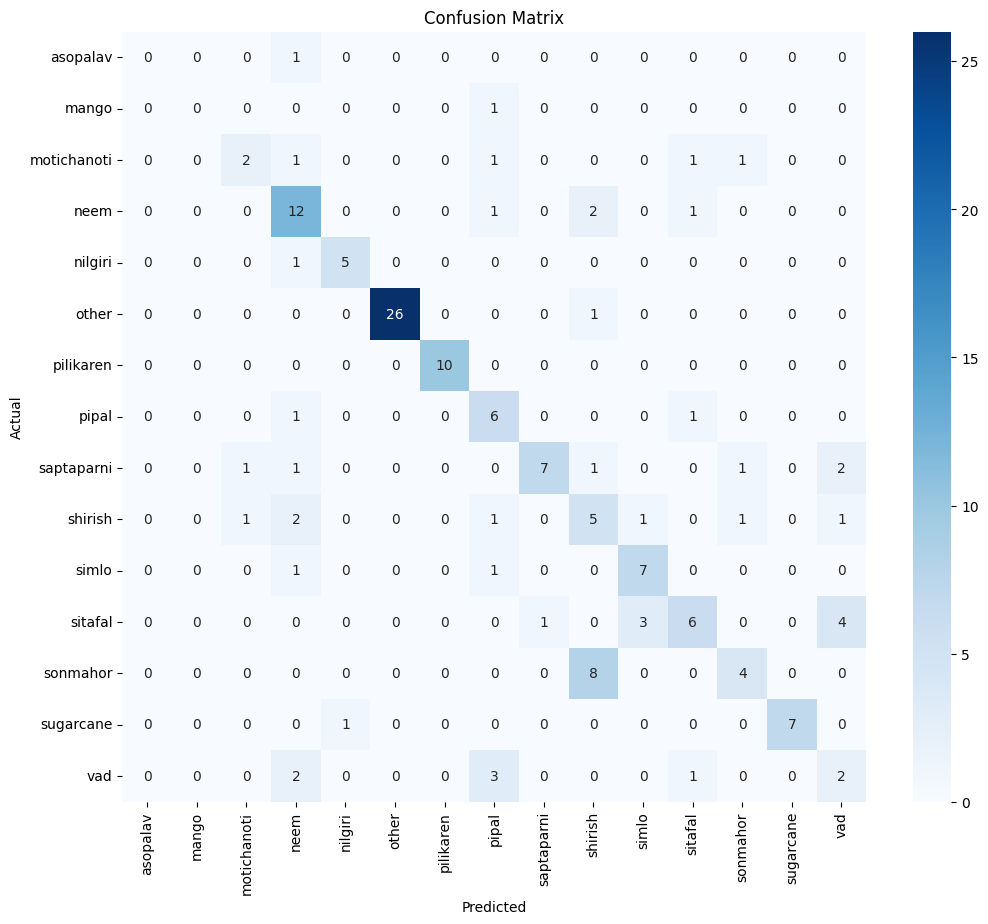

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=labels_in_test)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=target_names_subset,
            yticklabels=target_names_subset,
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      0.33      0.40         6
           5       0.55      0.75      0.63        16
           6       0.83      0.83      0.83         6
           7       1.00      0.96      0.98        27
           8       1.00      1.00      1.00        10
           9       0.43      0.75      0.55         8
          10       0.88      0.54      0.67        13
          11       0.29      0.42      0.34        12
          12       0.64      0.78      0.70         9
          13       0.60      0.43      0.50        14
          14       0.57      0.33      0.42        12
          15       1.00      0.88      0.93         8
          16       0.22      0.25      0.24         8

    accuracy                           0.66       151
   macro avg       0.57      0.55      0.55       151
weighted avg       0.68   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


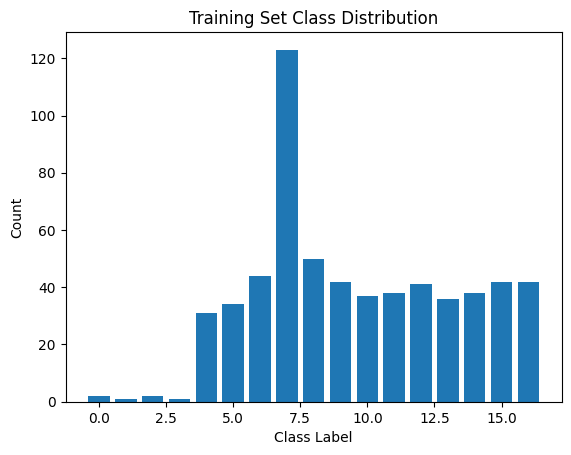

In [14]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')
plt.show()


In [15]:
import numpy as np

print("Unique classes in y_test:", np.unique(y_test))
print("Number of classes in y_test:", len(np.unique(y_test)))


Unique classes in y_test: [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Number of classes in y_test: 15


In [16]:
from sklearn.metrics import classification_report

# Match labels manually
present_classes = np.unique(y_test)
target_names = le.classes_[present_classes]  # Only use names of present labels

print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    asopalav       0.00      0.00      0.00         1
       mango       0.00      0.00      0.00         1
 motichanoti       0.50      0.33      0.40         6
        neem       0.55      0.75      0.63        16
     nilgiri       0.83      0.83      0.83         6
       other       1.00      0.96      0.98        27
   pilikaren       1.00      1.00      1.00        10
       pipal       0.43      0.75      0.55         8
  saptaparni       0.88      0.54      0.67        13
     shirish       0.29      0.42      0.34        12
       simlo       0.64      0.78      0.70         9
     sitafal       0.60      0.43      0.50        14
    sonmahor       0.57      0.33      0.42        12
   sugarcane       1.00      0.88      0.93         8
         vad       0.22      0.25      0.24         8

    accuracy                           0.66       151
   macro avg       0.57      0.55      0.55       151
weighted avg       0.68   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
print(classification_report(y_test, y_pred,
                            labels=present_classes,
                            target_names=le.classes_[present_classes]))


              precision    recall  f1-score   support

    asopalav       0.00      0.00      0.00         1
       mango       0.00      0.00      0.00         1
 motichanoti       0.50      0.33      0.40         6
        neem       0.55      0.75      0.63        16
     nilgiri       0.83      0.83      0.83         6
       other       1.00      0.96      0.98        27
   pilikaren       1.00      1.00      1.00        10
       pipal       0.43      0.75      0.55         8
  saptaparni       0.88      0.54      0.67        13
     shirish       0.29      0.42      0.34        12
       simlo       0.64      0.78      0.70         9
     sitafal       0.60      0.43      0.50        14
    sonmahor       0.57      0.33      0.42        12
   sugarcane       1.00      0.88      0.93         8
         vad       0.22      0.25      0.24         8

    accuracy                           0.66       151
   macro avg       0.57      0.55      0.55       151
weighted avg       0.68   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
